In [5]:
import sys
sys.path.insert(0, '..')
from visualization import test_subgroup_separation, plot_k_series_with_shaps

In [6]:
import copy
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import ShuffleSplit

In [7]:
df = pd.read_csv('../data/sin_synth/SIN_NORMAL_500_v3.csv')

In [8]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,-1.037213,0.122516,2.222373,1.768441,0.535370,0.817126,0.887564,0.177032,-0.637317,0.170172,...,3.307236,3.567945,3.041047,2.650529,2.192301,NaN,NaN,NaN,0.424577,0.0
1,1.335390,1.592021,0.105620,-0.569830,-1.936606,-2.159233,0.055004,-0.304618,-0.428491,-2.114047,...,-3.127266,-2.525985,-2.156904,-1.265969,-1.088417,NaN,NaN,NaN,0.792029,0.0
2,0.576089,-0.614140,-1.955747,-0.383681,0.071087,0.605902,1.198012,1.982545,-0.035235,-1.106450,...,-2.174720,-2.015002,-1.678418,0.244067,1.764900,NaN,NaN,NaN,0.336560,0.0


In [9]:
df.error.describe()

count    500.000000
mean       0.692590
std        0.222238
min        0.247278
25%        0.485802
50%        0.780755
75%        0.903432
max        0.999553
Name: error, dtype: float64

In [10]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [11]:
len(df)

500

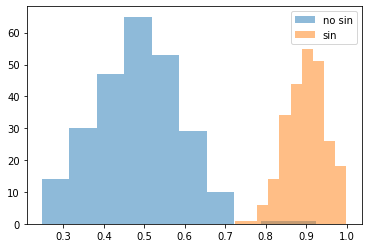

In [12]:
# Plot error distributions
plt.hist(df.loc[df['label']==0, 'error'], alpha=0.5, label='no sin')
plt.hist(df.loc[df['label']==1, 'error'], alpha=0.5, label='sin')
plt.legend(loc='upper right')

In [13]:
X = df.drop(columns=['error', 'label', 'sin_x0', 'sin_x1', 'sin_y']) #
y = df['error']

In [14]:
sss = ShuffleSplit(n_splits=1, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [15]:
from gendis.genetic import GeneticExtractor
from gendis.subgroup_distance import SubgroupDistance

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [21]:
DIST_THRESHOLD = 3

fitness_func = SubgroupDistance(
    distance_function=SubgroupDistance.wasserstein_distance, 
    shapelet_dist_threshold=DIST_THRESHOLD,
    min_support=10,
    standardize=False
)

args = {
    "dist_function": "dtw",
    "apply_differencing": True,
    "fitness": fitness_func,
    "population_size": 200, 
    "iterations": 100,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3,
    "max_shaps": 10,
    "wait": 20, 
    "min_len": 20,
    "max_len": 60,
    "n_jobs": multiprocessing.cpu_count() - 3,
    "verbose": True,
    "dist_threshold": DIST_THRESHOLD,
} 

gendis = GeneticExtractor(**args)

In [22]:
gendis.__dict__

{'dist_function': <function gendis.shapelets_distances.dtw(timeseries_matrix, shaps, distances)>,
 'dist_func_returns': True,
 'fitness': <gendis.subgroup_distance.SubgroupDistance at 0x7b9ecb560a90>,
 'apply_differencing': True,
 'population_size': 200,
 'iterations': 100,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 20,
 'max_len': 60,
 'max_shaps': 10,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shape

In [23]:
%%time
gendis.fit(X_train, y_train)

it		avg		max		time
1		-85499.956		0.416529	8.2384
2		-56499.8701		0.416529	6.7565
3		-19999.7298		0.416529	5.4809
4		-4999.6456		0.416529	3.8246
5		-8999.6436		0.416529	3.4898
6		-3499.619		0.416529	2.8801
7		-2999.6099		0.416529	3.1987
8		-4999.6126		0.416529	2.9259
9		-4499.6069		0.416529	2.8359
10		-5999.6142		0.416529	2.8967
11		-5999.6134		0.416529	2.8754
12		-7499.6215		0.416529	2.6406
13		-5499.6204		0.416529	2.3529
14		-2999.6069		0.416529	2.3128
15		-2499.6093		0.416529	2.581
16		-7499.6291		0.416529	2.094
17		-5999.6299		0.416529	2.1641
18		-4499.6383		0.416529	2.0142
19		-4999.6219		0.416529	2.2059
20		-6499.6309		0.416529	2.0872
CPU times: user 2min 2s, sys: 708 ms, total: 2min 3s
Wall time: 2min 29s


In [24]:
%%time
distances = gendis.transform(X_test, standardize=False, return_positions=True)

CPU times: user 178 ms, sys: 4.7 ms, total: 183 ms
Wall time: 179 ms


In [25]:
distances.describe()

,D_0,D_1,D_2,L_0,L_1,L_2
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,3.461318,3.422221,3.503233,57.672000,56.292000,57.240000
std,1.032141,1.285458,1.187579,35.353357,34.685372,34.752689
min,2.189415,1.842156,2.216435,0.000000,0.000000,0.000000
25%,2.510678,2.239670,2.396690,24.000000,27.000000,24.750000
50%,2.751298,2.716970,2.829759,61.500000,60.000000,60.000000
75%,4.399828,4.653037,4.610460,90.000000,87.000000,90.000000
max,6.095596,6.041908,5.997545,114.000000,114.000000,114.000000


Testing separation for shapelet 0


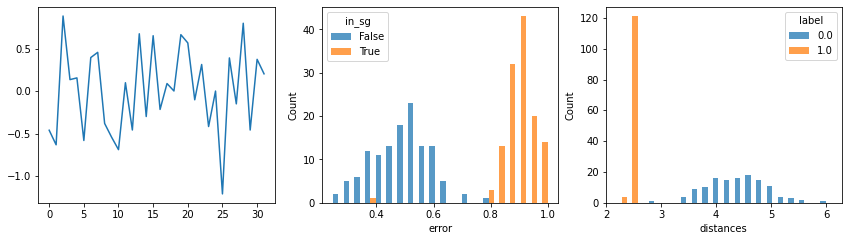

Subgroup 'accuracy': 0.996
confusion matrix, label x subgroup label
[[124   1]
 [  0 125]]
Error stats
Samples in subgroup:
count    126.000000
mean       0.896122
std        0.063848
min        0.388913
25%        0.867499
50%        0.898131
75%        0.927651
max        0.999553
Name: error, dtype: float64

Samples not in subgroup:
count    124.000000
mean       0.488938
std        0.098800
min        0.247278
25%        0.423550
50%        0.489456
75%        0.552274
max        0.792029
Name: error, dtype: float64
Testing separation for shapelet 1


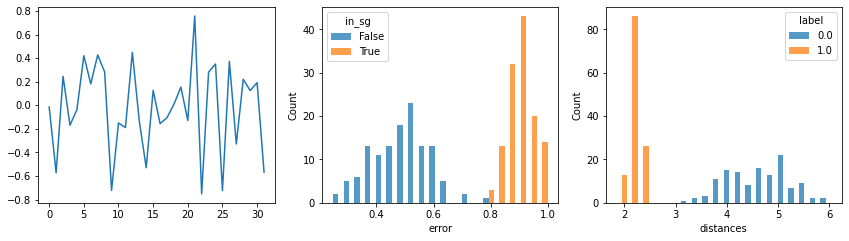

Subgroup 'accuracy': 1.0
confusion matrix, label x subgroup label
[[125   0]
 [  0 125]]
Error stats
Samples in subgroup:
count    125.000000
mean       0.900179
std        0.044924
min        0.784651
25%        0.869098
50%        0.898529
75%        0.928023
max        0.999553
Name: error, dtype: float64

Samples not in subgroup:
count    125.000000
mean       0.488138
std        0.098806
min        0.247278
25%        0.423126
50%        0.488626
75%        0.550909
max        0.792029
Name: error, dtype: float64
Testing separation for shapelet 2


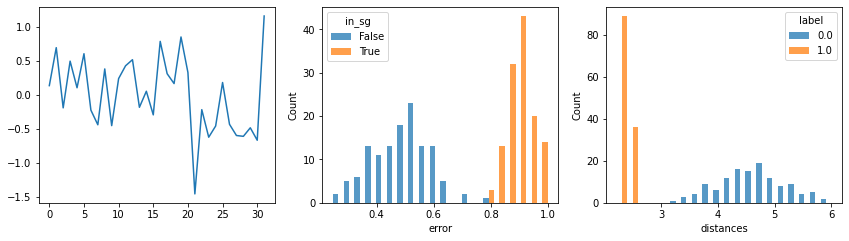

Subgroup 'accuracy': 1.0
confusion matrix, label x subgroup label
[[125   0]
 [  0 125]]
Error stats
Samples in subgroup:
count    125.000000
mean       0.900179
std        0.044924
min        0.784651
25%        0.869098
50%        0.898529
75%        0.928023
max        0.999553
Name: error, dtype: float64

Samples not in subgroup:
count    125.000000
mean       0.488138
std        0.098806
min        0.247278
25%        0.423126
50%        0.488626
75%        0.550909
max        0.792029
Name: error, dtype: float64


In [26]:
for i, shap in enumerate(gendis.best['shapelets'], start=0):
    print(f"Testing separation for shapelet {i}")
    _X_test = copy.deepcopy(X_test)
    _y_test = copy.deepcopy(y_test)
    
    subgroups = gendis.get_subgroups(_X_test, _y_test, shapelets=[shap])
    
    _X_test['distances'] = distances[f'D_{i}']
    _X_test['positions'] = distances[f'L_{i}']
     
    test_subgroup_separation(
        df=df, 
        X=_X_test, 
        y=_y_test, 
        subgroups=subgroups, 
        shap=shap
    )

In [27]:
_X_test = _X_test.sort_values(by='distances')

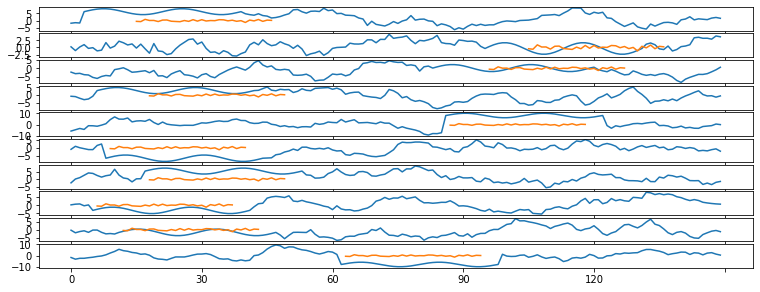

In [29]:
plot_k_series_with_shaps(
    _X_test, k=10, 
    shap=gendis.best['shapelets'][0], 
    X_ordered=True
)